In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy
#sy.init_printing()
import numpy as np
import math
import scipy as sc
from vpython import *

In [2]:
x = sy.symbols('x')
#init_printing()

In [3]:
y = x
y

x

# 1. Experimentelle Daten

## (a) 
Führen Sie das Phyhox-Fahrstuhl Experiment durch und stellen sie die Daten für Ort, Geschwindigkeit und Beschleunigung als Funktion der Zeit mit matplotlib graphisch dar.
Mit welchen Funktionen können die Daten beschrieben werden?
Simulieren sie die Bewegung mit vpython oder pyplay

In [4]:
#pd.read_excel("\D:\Dokumente\Uni\6.Semester\Modellbildung und Simulation\Aufgabe 1\phyphoxTestdatenFahrstuhl.xls")
experiment = pd.read_csv("Pressure and velocity.csv", ",")
experiment_beschleunigung = pd.read_csv("Acceleration.csv", ",")

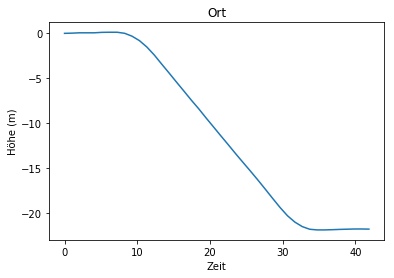

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Ort')
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Höhe (m)')
ax1.plot(experiment.values[:,0], experiment.values[:,2])
plt.show()

In [116]:
# theoretisch definition für funktion höhe siehe plot 
#oben jedoch totaler schwachsinn beachte es garnicht
def hoehe(x):
    return -1/(0.044+math.exp(-0.26*(x-8)))

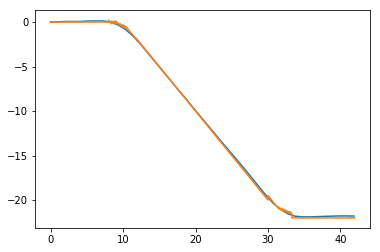

In [688]:
def height(x):
    if x < 8:
        return 0.0
    elif x < 8.4:
        return 8.2-x
    elif x < 8.7:
        return 8.5 - x
    elif x < 9:
        return 8.8 -x
    elif x < 9.3:
        return 9.1-x
    elif x < 9.6:
        return 9.2-x
    elif x < 10:
        return 9.4-x
    elif x < 10.3:
        return 9.7-x
    elif x < 10.6:
        return 9.85-x
    elif x < 11.8:
        return 9.9-x
    elif x < 30:
        return 10-x
    elif x < 31.5:
        return 10.5-x
    elif x < 31.8:
        return 10.7-x
    elif x < 32.1:
        return 10.9-x
    elif x < 32.4:
        return 11.1-x
    elif x < 32.7:
        return 11.3-x
    elif x < 32.9:
        return 11.45-x
    elif x < 33.1:
        return 11.6-x
    elif x < 33.3:
        return 11.75-x
    elif x < 42:
        return -22
    
x = np.arange(0,45, 0.01)
y = [height(xs) for xs in x]
plt.plot(experiment.values[:,0], experiment.values[:,2])
plt.plot(x,y)

In [7]:
# funktion aus python die polynom zurück gibt
np.polyfit(experiment.values[:,0], experiment.values[:,2], deg=3)

array([ 0.00126955, -0.07983813,  0.63045598, -0.70123562])

[ 3.43080136e-13 -3.73582796e-12 -6.47703595e-09  6.88877633e-07
 -3.22524522e-05  8.09953174e-04 -1.10851866e-02  7.57536369e-02
 -2.32271565e-01  2.65352663e-01 -1.81583159e-02]


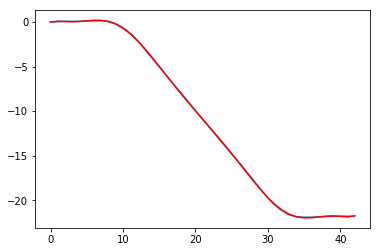

In [8]:
ort = np.polyfit(experiment.values[:,0], experiment.values[:,2], deg=10)
x = range(0, 43)
print(ort)
y = np.polyval(ort, x)
plt.plot(experiment.values[:,0], experiment.values[:,2])
plt.plot(x,y, 'r')
#x2 = range(0,43)
#y2= [hoehe(xs) for xs in x2]
#plt.plot(x2, y2, 'r')
#besch = sc.diff(ort)
#ydot = np.polyval(besch, x)
#plt.plot(x, ydot)

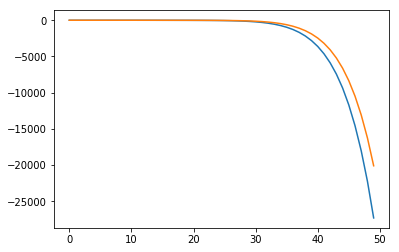

In [9]:
# geschwindigkeit (ableitung ort) du brauchst ein polynom um so ableiten zu können
gesch = sc.diff(ort)
x = range(0, 50)
ydot = np.polyval(gesch, x)
plt.plot(x, ydot)
#beschleunigung
besch = sc.diff(gesch)
yddot = np.polyval(besch, x)
plt.plot(x, yddot)

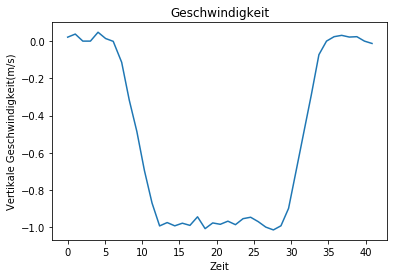

In [10]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title('Geschwindigkeit')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Vertikale Geschwindigkeit(m/s)')
ax2.plot(experiment.values[:,0], experiment.values[:,4])

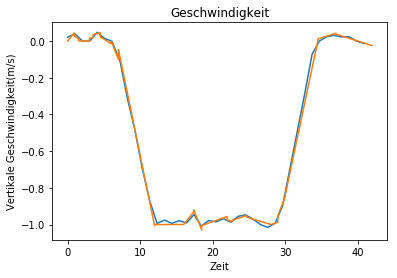

In [689]:
def speed(x):
    if x < 0.9:
        return x/20
    elif x < 1.5:
        return 0.05-x/40
    elif x < 3:
        return 0
    elif x < 3.5:
        return x/200
    elif x < 4.5:
        return x/100
    elif x < 6:
        return 0.01-(x-5)/40
    elif x < 7:
        return 0.6+-x/10
    elif x < 12:
        return 1.3-x/5.2
    elif x < 16:
        return -1
    elif x < 17.4:
        return (x/20)-1.8
    elif x < 18.5:
        return (-x/10)+0.82
    elif x < 22:
        return x/70-1.27
    elif x < 22.7:
        return -x/80-0.7
    elif x < 24.7:
        return x/80-1.26
    elif x < 28:
        return -x/80-0.65
    elif x < 29:
        return x/80-1.35
    elif x < 30:
        return x/10-3.85
    elif x < 34.5:
        return x/5.35-6.45
    elif x < 37:
        return x/80-0.42
    elif x < 42:
        return -x/80+0.5
    
        
        
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title('Geschwindigkeit')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Vertikale Geschwindigkeit(m/s)')
ax2.plot(experiment.values[:,0], experiment.values[:,4])

x = np.arange(0,45, 0.01)
y = [speed(xs) for xs in x]
ax2.plot(x,y)

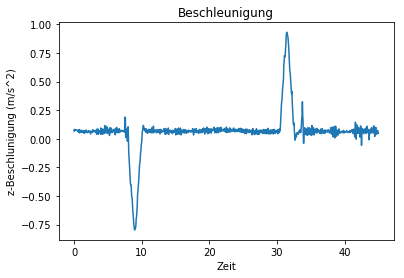

In [11]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.set_title('Beschleunigung')
ax3.set_xlabel('Zeit')
ax3.set_ylabel('z-Beschlunigung (m/s^2)')
ax3.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.show()

In [12]:
def beschl(x):
    if x < 7.5:
        return 0.07
    elif x < 8.8:
        return -0.669*x+5.089
    elif x < 10.4:
        return 0.512*x-5.373
    elif x < 30:
        return 0.07

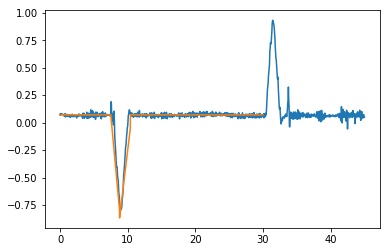

In [13]:
x = np.arange(0,45, 0.01)
y = [beschl(xs) for xs in x]
plt.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.plot(x,y)

31.46377846 0.931424996


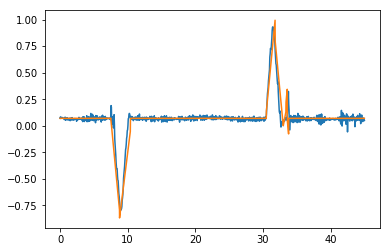

In [690]:
def accel(x):
    if x < 7.5:
        return 0.07
    elif x < 8.8:
        return -0.669*x+5.089
    elif x < 10.4:
        return 0.512*x-5.373
    elif x < 30.5:
        return 0.07
    elif x < 31.8:
        return x/1.5-20.2
    elif x < 33:
        return -x/1.5+22
    elif x < 33.4:
        return x/3-11
    elif x < 33.6:
        return x/1.5-22.05
    elif x < 33.8:
        return -x/1.5+22.45
    else:
        return 0.07
#zum schluss noch ein bisschen verzerrung rein bringen oder passt das so?    
x = np.arange(0,45, 0.01)
y = [accel(xs) for xs in x]
plt.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.plot(x,y)
print(experiment_beschleunigung.values[630,0], experiment_beschleunigung.values[630,1])

In [14]:
experiment.values[1,0], experiment.values[1,2]
experiment.values[2,0], experiment.values[2,2]
experiment.values[3,0], experiment.values[3,2]

(3.053313, 0.060081318700000004)

In [15]:
a = sy.Symbol("a")
b = sy.Symbol("b")
c = sy.Symbol("c")


## (b) 
Welches Polynom beschreibt am bested die Daten Unbekannt.txt. Verwenden Sie pylab.polyfit

In [16]:
poly = np.loadtxt("UnbekannteDaten.txt", skiprows=1)

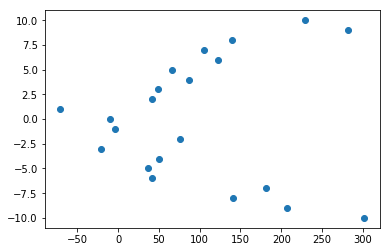

In [17]:
plt.plot(poly[:,0], poly[:,1], 'o')

In [18]:
p = np.polyfit(poly[:,0], poly[:,1], deg=5)

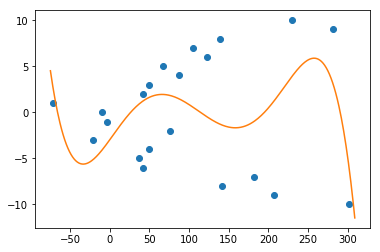

In [19]:
x = range(-75,310)
y = np.polyval(p,x)
plt.plot(poly[:,0], poly[:,1], 'o')
plt.plot(x,y)
plt.show()

## (c) 
Es werden verschiedene Massen an eine vertikale Feder gehängt und die Federlängen bestimmt die Daten befinden sich im File DatenFeder.txt. Führen Sie eine lineare Regession mit pylab.polyfit durch und bestimmen Sie die Federkonstanten für eine lineare ($F = Dx$) und eine kubische Funktion ($F = D_1x + D_2x^2 + D_3x^3$)

In [20]:
feder = np.loadtxt("DatenFeder.txt", skiprows=1)

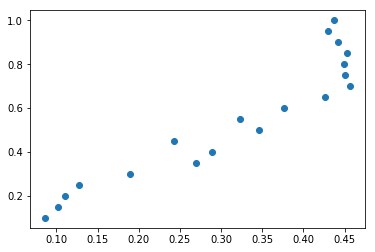

In [21]:
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

In [22]:
linear = np.polyfit(feder[:,0], feder[:,1], deg=1)

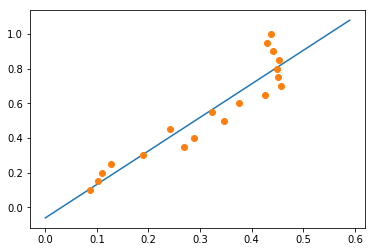

In [23]:
x = np.arange(0, 0.6, 0.01)
y = [linear[0]*xs + linear[1] for xs in x]
plt.plot(x,y)
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

In [24]:
kubic = np.polyfit(feder[:,0], feder[:,1], deg=4)

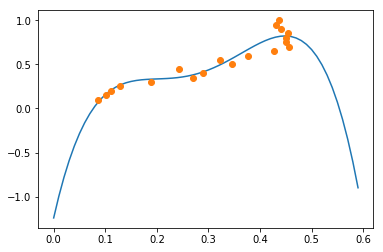

In [25]:
x = np.arange(0, 0.6, 0.01)
y = [kubic[0]*xs**4 + kubic[1]*xs**3 + kubic[2]*xs**2 + kubic[3]*xs + kubic[4] for xs in x]
plt.plot(x,y)
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

## (d)
Ein kleiner Ball wird mit einer bestimmten Anfangsgeschwindigkeit unter einem bestimmten Abwurfwinkel geworfen und die $x$- und $y$-Position zu verschiedenen Zeitpunkten mit einer Videoanalyse gemessen (DatenSchWurf.txt). Führen Sie eine lineare Regression mit pylab polyfit durch. Schätzen sie die Flugzeit und Geschwindigkeit des Balles ab.

In [26]:
wurf = np.loadtxt("DatenSchWurf.txt", skiprows=1)

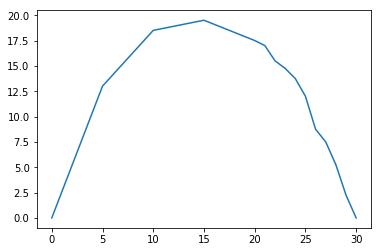

In [27]:
distance = wurf[:,0]
height = wurf [:,1]
plt.plot(distance, height)

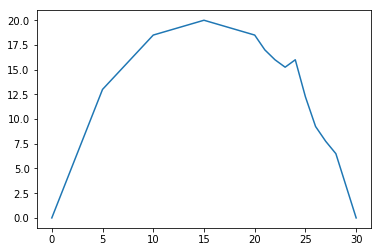

In [28]:
height2 = wurf[:,2]
plt.plot(distance, height2)

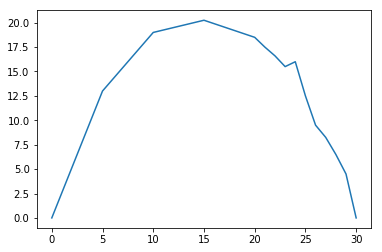

In [29]:
height3 = wurf[:,3]
plt.plot(distance, height3)

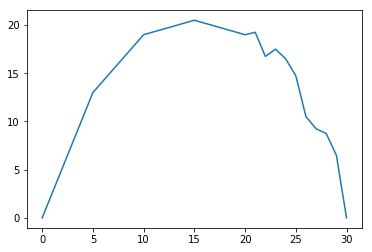

In [30]:
height4 = wurf[:,4]
plt.plot(distance, height4)

In [31]:
distance = wurf[:,0]
height = wurf[:,1:4]
c = np.polyfit(distance, height, deg=2)
c

array([[-0.08906891, -0.09014064, -0.09041047],
       [ 2.64889548,  2.71009403,  2.72935024],
       [ 0.71048819,  0.52352761,  0.55393343]])

-0.09041047350266546 2.7293502351834444 0.5539334274066994


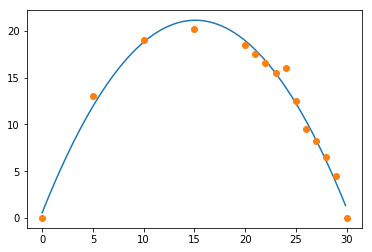

In [32]:
x = np.arange(0, 30, 0.1)
print(c[0,2],c[1,2],c[2,2])
y = [c[0,2]*xs**2 + c[1,2]*xs + c[2,2] for xs in x]
plt.plot(x,y)
plt.plot(wurf[:,0], wurf[:,3], 'o')
plt.show()

# 2. Wurfbewegung

## (a)
Ein Objekt wird von $x = x_0$ mit einer Anfangsgeschwindigkeit $v_0$ und einem Anfangswinkel $\theta_0$ abgeworfen. Die Reibung kann vernachlässtigt werden. Die einzige Kraft ist die Gravitationskraft in $y$-Richtung.

### i.
Lösen Sie die Differentialgleichungen: $\ddot{x} = 0, \ddot{y} = -g$ numerisch und vergleichen Sie das Ergebnis mit der analytischen Lösungen. Berechnen Sie die Wurfweite als Funktion des Abwurfwinkels.

In [33]:
g = 9.81

In [34]:
t, y0, v0, theta0 = sy.symbols('t, y0, v0, theta0')
y, dy = sy.symbols('y, dy', function=True)
vx0 = v0*sy.cos(theta0)
vy0 = v0*sy.sin(theta0)
print(vx0)
print(vy0)

eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), -9.81)
print('eq_dy: ', eq_dy)
sol_dy = sy.dsolve(eq_dy)
print('sol_dy: ', sol_dy)
ics = {dy(0): vy0}
print('ics', ics)
C_dy_eq = sy.Eq(sol_dy.lhs.subs(t,0).subs(ics), sol_dy.rhs.subs(t,0))
print('C_dy_eq', C_dy_eq)
C_dy_sol = sy.solve(C_dy_eq)
print('C_dy_sol', C_dy_sol)
dy = sol_dy.subs(C_dy_sol[0])
print('sol_dy', dy)
eq_y = sy.Eq(sy.Derivative(y(t),t , 1), dy.rhs)
print('eq_y', eq_y)
sol_y = sy.dsolve(eq_y)
print('sol_y', sol_y)
ics = {y(0): 0}
C_y_eq = sy.Eq(sol_y.lhs.subs(t, 0).subs(ics), sol_y.rhs.subs(t,0))
print('C_y_eq: ', C_y_eq)
C_y_sol = sy.solve(C_y_eq)
print('C_y_sol: ', C_y_sol)
if isinstance(C_y_sol[0], dict):
    y = sol_y.subs(C_y_sol[0]).rhs
else:
    y = sol_y.subs({C_y_eq.rhs : C_y_eq.lhs}).rhs
print('y: ', y)

v0*cos(theta0)
v0*sin(theta0)
eq_dy:  Eq(Derivative(dy(t), t), -9.81000000000000)
sol_dy:  Eq(dy(t), C1 - 9.81*t)
ics {dy(0): v0*sin(theta0)}
C_dy_eq Eq(v0*sin(theta0), C1)
C_dy_sol [{C1: v0*sin(theta0)}]
sol_dy Eq(dy(t), -9.81*t + v0*sin(theta0))
eq_y Eq(Derivative(y(t), t), -9.81*t + v0*sin(theta0))
sol_y Eq(y(t), C1 - 4.905*t**2 + 1.0*t*v0*sin(theta0))
C_y_eq:  Eq(0, C1)
C_y_sol:  [0]
y:  -4.905*t**2 + 1.0*t*v0*sin(theta0)


In [37]:
t, x0, v0, theta0, x_v = sy.symbols('t, x0, v0, theta0, x_v')
x, dx = sy.symbols('x, dx', function=True)
eq_dx = sy.Eq(sy.Derivative(dx(t), t, 1), 0)
print('eq_dx: ', eq_dx)
sol_dx = sy.dsolve(eq_dx)
print('sol_dx: ', sol_dx)
ics = {dx(0): vx0}
print('ics', ics)
C_dx_eq = sy.Eq(sol_dx.lhs.subs(t,0).subs(ics), sol_dx.rhs.subs(t,0))
print('C_dx_eq', C_dx_eq)
C_dx_sol = sy.solve(C_dx_eq)
print('C_dx_sol', C_dx_sol)
dx = sol_dx.subs(C_dx_sol[0])
print('sol_dx', dx)
eq_x = sy.Eq(sy.Derivative(x(t),t , 1), dx.rhs)
print('eq_x', eq_x)
sol_x = sy.dsolve(eq_x)
print('sol_x', sol_x)
ics = {x(0): x0}
C_x_eq = sy.Eq(sol_x.lhs.subs(t, 0).subs(ics), sol_x.rhs.subs(t,0))
print('C_x_eq: ', C_x_eq)
C_x_sol = sy.solve(C_x_eq)
print('C_x_sol: ', C_x_sol)
x = sy.Eq(x_v, sol_x.subs(C_x_sol[0]).rhs)
print('x: ', x)
t_x = sy.solve(x, t)
print('t nach x: ', t_x)
print(y)
y_v = y.subs({t: t_x[0]})
print('y with t: \t', y_v)
y_v = sy.simplify(y_v)
print(y_v)

eq_dx:  Eq(Derivative(dx(t), t), 0)
sol_dx:  Eq(dx(t), C1)
ics {dx(0): v0*cos(theta0)}
C_dx_eq Eq(v0*cos(theta0), C1)
C_dx_sol [{C1: v0*cos(theta0)}]
sol_dx Eq(dx(t), v0*cos(theta0))
eq_x Eq(Derivative(x(t), t), v0*cos(theta0))
sol_x Eq(x(t), C1 + t*v0*cos(theta0))
C_x_eq:  Eq(x0, C1)
C_x_sol:  [{C1: x0}]
x:  Eq(x_v, t*v0*cos(theta0) + x0)
t nach x:  [(-x0 + x_v)/(v0*cos(theta0))]
-4.905*t**2 + 1.0*t*v0*sin(theta0)
y with t: 	 1.0*(-x0 + x_v)*sin(theta0)/cos(theta0) - 4.905*(-x0 + x_v)**2/(v0**2*cos(theta0)**2)
(x0 - x_v)*(-0.5*v0**2*sin(2*theta0) - 4.905*x0 + 4.905*x_v)/(v0**2*cos(theta0)**2)


In [117]:
x0_val = 0
v0_val = 20
theta0_val = math.radians(45)

In [41]:
def x_max(theta0):
    return ((v0_val)**2+sy.sin(2*theta0))/g

-0.005*x_v*(4.905*x_v - 200.0)


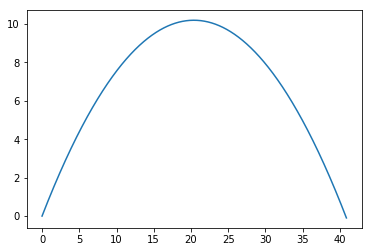

In [43]:
y_val = y_v.subs({x0: x0_val, v0: v0_val, theta0: theta0_val})
print(y_val)
xs = np.arange(0, x_max(theta0_val), 0.01)
#for x_v in xs:
y_list = []
for x_i in xs:
    y_i = y_val.subs({x_v: x_i})
    y_list.append(y_i)
plt.plot(xs, y_list)

In [104]:
t_start = 0
t_max = (v0_val*sy.sin(theta0_val))/g
t_end = 2*t_max # symmetrisch
h = 0.5
sy.pprint(t_end)

2.88320807823261


In [105]:
ddx = 0
ddy = -g

In [106]:
def euler(var, h, dvar):
    return var + h*dvar

In [107]:
vx0_e = v0_val*sy.cos(theta0_val)
vy0_e = v0_val*sy.sin(theta0_val)
sy.pprint(vx0_e)
y0_val = 0
vx_n = vx0_e
x_n = x0_val
x_e = [x0_val]
y_n = y0_val
vy_n = vy0_e
y_e = [y0_val]
for ts in np.arange(t_start, t_end, h):
    vy_np1 = euler(vy_n, h, ddy)
    y_np1 = euler(y_n, h, vy_np1)
    vy_n = vy_np1
    y_n = y_np1
    vx_np1 = euler(vx_n, h, ddx)
    x_np1 = euler(x_n, h, vx_np1)
    if y_np1 >= y0_val:
        y_e.append(y_np1)
        x_e.append(x_np1)
    else:
        y_e.append(y_np1)
        x_e.append(x_np1)
        break
    vx_n = vx_np1
    x_n = x_np1
#sy.pprint(x_e)

14.1421356237310


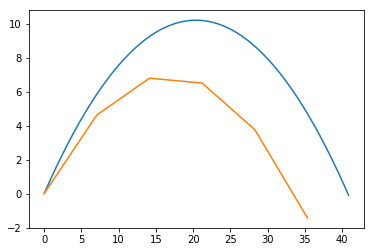

In [108]:
plt.plot(xs, y_list)
plt.plot(x_e, y_e)

In [54]:
x0_e = x0
print('x(0) euler: ')
sy.pprint(x0_e)
x1_e = x0_e + h*vx0_e
sy.pprint(x1_e)

x(0) euler: 
x₀
0.01⋅v₀⋅cos(θ₀) + x₀


### ii.
Formulieren Sie die Aufgabe als Randwertproblem für einen senkrechten Wurf ($\theta_0 = \pi$). Bestimmen Sie die Anfangsgeschwindigkeit bei vorgegebener Wurfhöhe mit Hilfe einer binären Suche.

In [209]:
#x_max =((v0**2)*sy.sin(2*(math.pi)))/g
#print(x_max)
#x = np.arange(0, x_max, 0.1*10**-20)

#y = [wurf(y0, g, v0, theta0, xs) for xs in x]
#plt.plot(x,y)

## (b)
Ein kugelförmiges Objekt wird von einem Punkt $x_0$ unter einem Winkel $\theta_0$ abgeworfen. Es wirkt eine Reibungskraft entgegen der Bewegungsrichtung mit dem Bertag: $$F = 0.5\pi R^2pCv^2$$ ($R$: Radius der Kugel, $p$:Dichte der Luft, $v$: Geschwindigkeit der Kugel, $C = 0.5$)

### i.
Zeigen Sie, dass das Problem mit den folgenden Bewegungsgleichungen beschrieben werden kann. 
$$\ddot{x} = - \frac{0.5\pi R^2Cp}{m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}$$
$$\ddot{y} = -g- \frac{0.5\pi R^2Cp}{m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}$$

In [201]:
R, p, v, C, m, pi, dotx, doty, v_x, v_y = sy.symbols('R, p, v, C, m, pi, dotx, doty, v_x, v_y')
ddx, dx = sy.symbols('ddx, dx', function=True)

In [208]:
v_val = sy.sqrt(dotx**2 + doty**2)
B = 0.5*pi*R**2*p*C
B_prop = B/m
F_drag = -B*v**2
F_drag_x = F_drag_prop*v_x/v
sy.pprint(F_drag_x)
ddx = -0 + F_drag_x
sy.pprint(ddx)
ddx = ddx.subs(v, v_val)
sy.pprint(ddx)
ddx = ddx.subs(v_x, dotx)
sy.pprint(ddx)
F_drag_y = F_drag_prop*v_y/v
sy.pprint(F_drag_y)
ddy = -g + F_drag_y
sy.pprint(ddy)
ddy = ddy.subs(v, v_val)
sy.pprint(ddy)
ddy = ddy.subs(v_y, doty)
sy.pprint(ddy)

        2          
-0.5⋅C⋅R ⋅p⋅π⋅v⋅vₓ 
───────────────────
         m         
        2          
-0.5⋅C⋅R ⋅p⋅π⋅v⋅vₓ 
───────────────────
         m         
                    _______________ 
        2          ╱     2       2  
-0.5⋅C⋅R ⋅p⋅π⋅vₓ⋅╲╱  dotx  + doty   
────────────────────────────────────
                 m                  
                      _______________ 
        2            ╱     2       2  
-0.5⋅C⋅R ⋅dotx⋅p⋅π⋅╲╱  dotx  + doty   
──────────────────────────────────────
                  m                   
        2           
-0.5⋅C⋅R ⋅p⋅π⋅v⋅v_y 
────────────────────
         m          
         2                 
  0.5⋅C⋅R ⋅p⋅π⋅v⋅v_y       
- ────────────────── - 9.81
          m                
                      _______________       
         2           ╱     2       2        
  0.5⋅C⋅R ⋅p⋅π⋅v_y⋅╲╱  dotx  + doty         
- ─────────────────────────────────── - 9.81
                   m                        
                       _______________ 

### ii.
Führen Sie die beiden Differentialgleichungen 2. Ordnung in ein System von 4 Differentialgleichungen 1. Ordnung über und visualisieren Sie die Wurftrajektorie.

### iii.
Untersuchen Sie die Wurfweite als Funktion der Masse und des Abwurfwinkels